# Instruction for assignment #1 (python version)
---

## Submission info

* Due:
* E-mail to:

## Instruction

- You can use any language you like, such as R or Python.
- I highly recommand you to use python3 (not python2), if you'd like to use python.
- We will use 3 csv files: 'transaction_par1.csv', 'offers.csv', 'trainHistory.csv' 
- The instruction was made by R, so the appearance of results may different.
- However, the value of the result must be the same with this instruction.

## Data information (In Korean)

#### trainHistory.csv
- id: 고객ID
- chain: 매점 체인
- offer: 쿠폰 ID
- market: 위치정보
- reprattrips: 재구매횟수
- repeater: 재구매여부
- offerdate: 쿠폰발행일자

#### offer.csv
- offer: 쿠폰 ID
- category: 제품종류
- quantity: 최소 구매 수
- company: 제조사
- offervalue: 할인가
- brand: 브랜드

#### transaction.csv
- id: 고객 ID
- chain: 매점 체인
- dept: 품목
- category: 제품 종류
- company: 제조사
- brand: 브랜드
- date: 구매일
- productsize: 구매 제품 양
- productmeasure: 제품단위
- productquantity: 구매 수
- productamount: 구매액

이 데이터는 다수의 고객에게 할인쿠폰을 제공하고, 그것에 고객들이 어떻게 반응했는지를 포함하고 있다. history 파일은 고객의 반응, offer 파일은 할인 쿠폰의 종류, transaction 파일은 구매 정보를 포함하고 있다.

transaction 파일은 history 파일과 (id, chain) 컬럼을 이용하여 join이 가능하다. history 파일은 offer 파일과 (offer) 컬럼을 이용하여 join이 가능하다. transaction 파일은 offer 파일과 (category, brand, company) 컬럼을 이용하여 join이 가능하다. productquantity와 purchaseamount에서의 음수값은 반품을 의미한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read data files

In [2]:
transactions = pd.read_csv('transaction_part1.csv')
transactions.head()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,12524696,4,9,907,102113020,15704,2012-03-06,16.00,OZ,1,1.69
1,12524696,4,12,1206,108660080,2559,2012-03-12,12.00,OZ,2,7.90
2,12524696,4,5,501,101600010,3331,2012-03-12,18.00,OZ,1,4.69
3,12524696,4,12,1203,103480030,9694,2012-03-14,3.75,OZ,1,4.79
4,12524696,4,9,907,107304070,25881,2012-03-14,16.00,OZ,1,4.59


In [3]:
offers = pd.read_csv('offers.csv')
offers.head()

,offer,category,quantity,company,offervalue,brand
0,1190530,9115,1,108500080,5.00,93904
1,1194044,9909,1,107127979,1.00,6732
2,1197502,3203,1,106414464,0.75,13474
3,1198271,5558,1,107120272,1.50,5072
4,1198272,5558,1,107120272,1.50,5072


In [4]:
trains = pd.read_csv('trainHistory.csv')
trains.head()

,id,chain,offer,market,repeattrips,repeater,offerdate
0,86246,205,1208251,34,5,t,2013-04-24
1,86252,205,1197502,34,16,t,2013-03-27
2,12682470,18,1197502,11,0,f,2013-03-28
3,12996040,15,1197502,9,0,f,2013-03-25
4,13089312,15,1204821,9,0,f,2013-04-01


## Problem 1: EDA with offers data

### (a) Find the number of offers by company. Show the table of the result, and illustrate it with bar plot.

104460040     7
103700030     5
107120272     5
107717272     2
105450050     2
1087744888    2
105100050     2
1076211171    2
1089520383    1
108079383     1
105190050     1
103320030     1
107106878     1
104127141     1
107127979     1
108500080     1
104610040     1
106414464     1
Name: company, dtype: int64

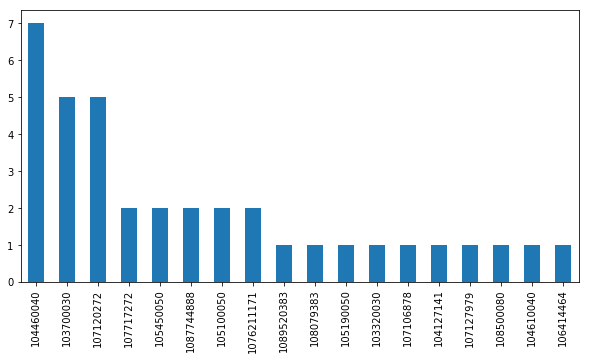

### (b) Find the number of offers by category. Show the table of the result, and illustrate it with bar plot.

5558    5
7205    5
1726    2
1703    2
2202    2
6202    2
4517    2
799     2
4401    2
5619    2
9909    2
5616    1
3504    1
9115    1
3509    1
706     1
2119    1
3203    1
5122    1
5824    1
Name: category, dtype: int64

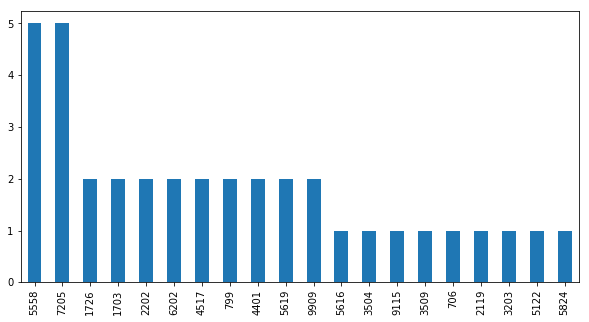

### (c) Find the number of offers by category. Show the table of the result, and illustrate it with bar plot.

4294      5
5072      5
7668      5
102504    2
13791     2
17286     2
1322      2
3718      2
64486     2
13474     1
28840     1
15889     1
93904     1
6926      1
26189     1
6732      1
17311     1
875       1
26456     1
Name: brand, dtype: int64

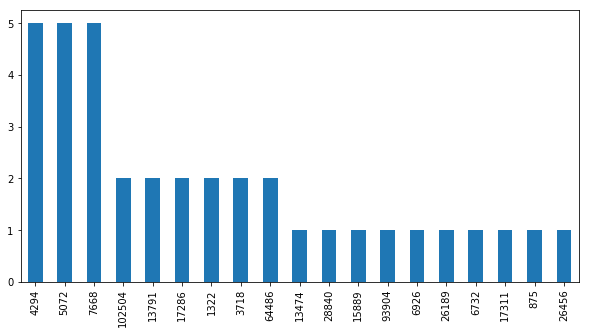

### (d) Find the (Min., 1Q, Median, Mean, 3Q, Max.) value of (offervalue, quantity)

count    37.000000
mean      1.648649
std       0.734704
min       0.750000
25%       1.500000
50%       1.500000
75%       1.500000
max       5.000000
Name: offervalue, dtype: float64

count    37.000000
mean      1.027027
std       0.164399
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: quantity, dtype: float64

### (e) Find all records from offer.csv which have 'quantity > 1' (Show all columns in the records)

,offer,category,quantity,company,offervalue,brand
31,1221658,7205,2,103700030,3.0,4294


## Problem 2: EDA with TrainHistory data

### (a) Find the minimum and maximum offer date in train history

'2013-03-01'

'2013-04-30'

### (b) Find the number of customer by each offer. Show the table of the result, and illustrate it with bar plot

1197502    45652
1208329    18767
1203052    15337
1208251    15028
1199256     7971
1204576     7293
1199258     7037
1194044     6810
1208501     6643
1200581     5032
1208252     3393
1200578     2922
1208503     2413
1204821     2326
1204822     2290
1198275     1977
1198272     1924
1200988     1418
1200582     1291
1200579     1238
1198274     1124
1198273      992
1198271      957
1200584      222
Name: offer, dtype: int64

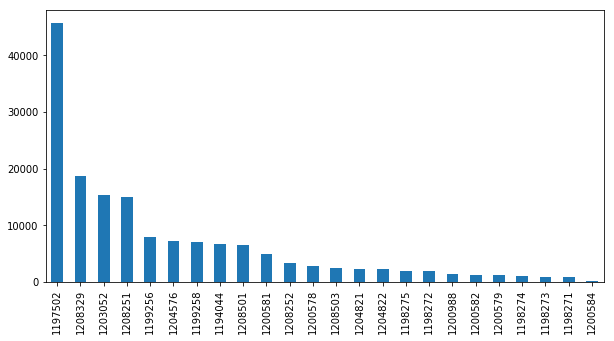

### (c) Find the number of customer by repeater. Show the table of the result.

,N
f,116619
t,43438


### (d) Find the ratio of repeater and add the column in (c) named 'ratio'. Show the table of the result.

,N,ratio
f,116619,0.728609
t,43438,0.271391


### (e) Merge two data (trainHistory.csv and offer.csv) by 'offer'. Find the repeater's distribution with the category. Show the table of the result, and illustrate it with bar plot.

,N
3203,45652
9909,22147
2119,18767
2202,18421
4401,15008
6202,9056
5616,7293
5558,6974
1726,6323
5619,4616


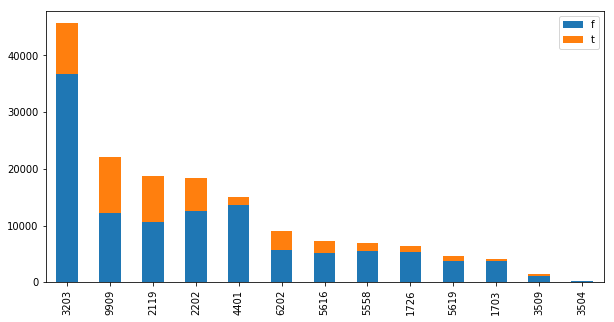

### (f) Print percentage of repeaters within a category.

,RepeatCustomers,TotalCustomers,ratio
9909,9950,22147,0.449271
2119,8152,18767,0.434379
6202,3333,9056,0.368043
2202,5857,18421,0.317952
5616,2075,7293,0.284519
3504,51,222,0.229730
5558,1385,6974,0.198595
3203,8940,45652,0.195829
3509,264,1418,0.186178
5619,792,4616,0.171577


### (g) Find the repeater's distribution with the brand. Show the table of the result, and illustrate it with bar plot.

,N
brand,
13474,45652
6926,18767
3718,18421
28840,15337
13791,15008
7668,10705
64486,9056
15889,7293
5072,6974


N      
repeater      f     t
brand                
13474     36712  8940
6926      10615  8152
3718      12564  5857
28840      8840  6497
13791     13676  1332
7668       9347  1358
64486      5723  3333
15889      5218  2075
5072       5589  1385
6732       3357  3453
102504     3824   792
875        1154   264

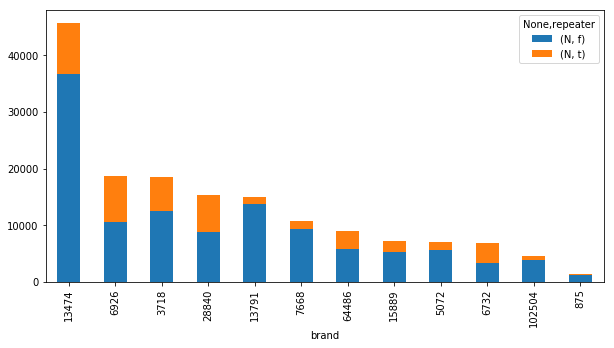

### (h) Print percentage of repeaters within a brand.

,RepeatCustomers,TotalCustomers,ratio
6732,3453,6810,0.507048
6926,8152,18767,0.434379
28840,6497,15337,0.423616
64486,3333,9056,0.368043
3718,5857,18421,0.317952
15889,2075,7293,0.284519
5072,1385,6974,0.198595
13474,8940,45652,0.195829
875,264,1418,0.186178
102504,792,4616,0.171577


### (i) Find the (Min., 1Q, Median, Mean, 3Q, Max.) value of repeattrips count.

count    43438.000000
mean         2.418412
std         12.862653
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       2124.000000
Name: repeattrips, dtype: float64

### (j) Find all records from merged data from (e), which have 'repeattrips > 100' (Show all columns in the records).

,id,chain,offer,market,repeattrips,repeater,offerdate,category,quantity,company,offervalue,brand
55105,3450535153,306,1197502,6,1418,t,2013-04-18,3203,1,106414464,0.75,13474
55196,3465135195,306,1197502,6,2124,t,2013-03-25,3203,1,106414464,0.75,13474
131670,4176323168,166,1203052,14,104,t,2013-04-01,9909,1,1089520383,1.00,28840
132523,4427711419,152,1203052,10,549,t,2013-04-02,9909,1,1089520383,1.00,28840


### (k) Find the repeat trip count distribution with the offer. Show the table of the result, and illustrate it with vertical box plot.

(0, 15)

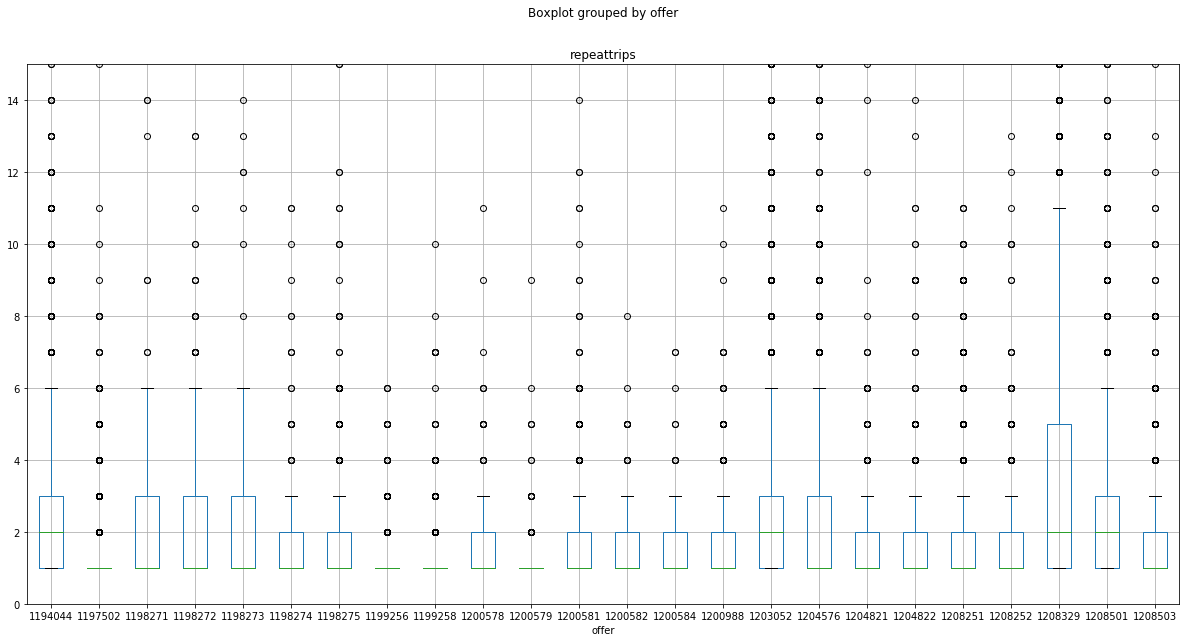

### (l) Find the repeat trip count distribution with the category. Show the table of the result, and illustrate it with vertical box plot.

(0, 15)

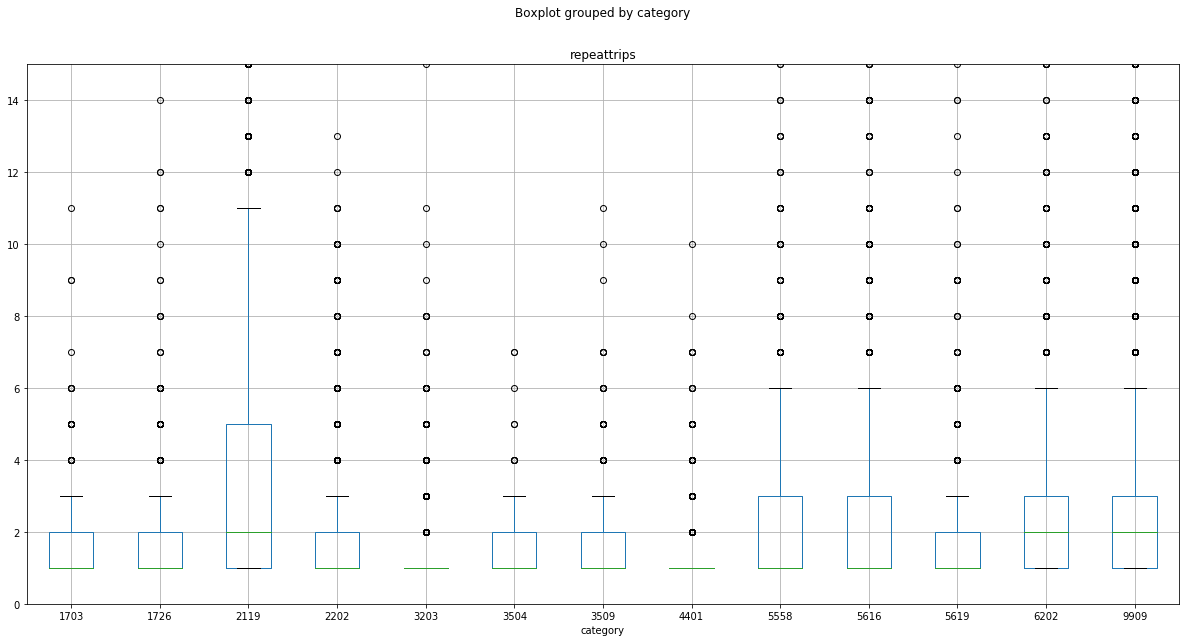

### (m) Find the repeat trip count distribution with the brand. Show the table of the result, and illustrate it with vertical box plot.

(0, 15)

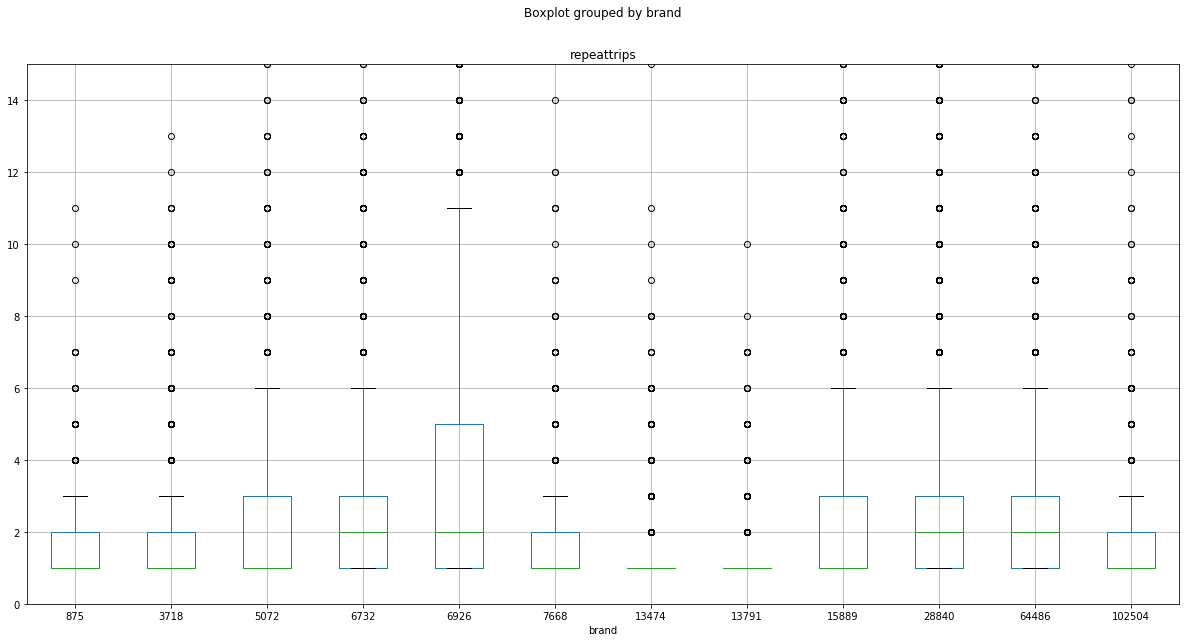

## Problem 3: EDA with Transaction data

### (a) Make new table by subsetting merged data from 'Problem 2-e', with attribute ('offer', 'id', 'market', 'repeattrips', 'repeater', 'offerdate', 'quantity', 'offervalue').

In [35]:
# the following DataFrame shows only the first 5 rows

,offer,id,market,repeattrips,repeater,offerdate,quantity,offervalue
0,1208251,86246,34,5,t,2013-04-24,1,2.0
1,1208251,15753725,4,0,f,2013-04-24,1,2.0
2,1208251,16535563,1,7,t,2013-04-27,1,2.0
3,1208251,18259179,2,0,f,2013-04-24,1,2.0
4,1208251,21024070,9,1,t,2013-04-23,1,2.0


### (b) Merge the transaction data and subset data from (a) , by id, with inner-join.

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount,offer,market,repeattrips,repeater,offerdate,quantity,offervalue
0,13807224,4,8,830,104123444,11382,2012-03-02,8.00,OZ,1,0.50,1204576,1,0,f,2013-04-05,1,1.0
1,13807224,4,5,516,107989373,29344,2012-03-12,7.40,OZ,2,5.58,1204576,1,0,f,2013-04-05,1,1.0
2,13807224,4,8,816,1060171262,48141,2012-03-12,15.00,OZ,1,3.69,1204576,1,0,f,2013-04-05,1,1.0
3,13807224,4,9,920,107641070,10160,2012-03-18,10.00,OZ,2,4.00,1204576,1,0,f,2013-04-05,1,1.0
4,13807224,4,9,920,107641070,10160,2012-03-18,12.00,OZ,1,2.00,1204576,1,0,f,2013-04-05,1,1.0
5,13807224,4,9,920,103010030,3744,2012-03-18,11.00,OZ,1,2.99,1204576,1,0,f,2013-04-05,1,1.0
6,13807224,4,9,902,101410010,45039,2012-03-18,30.00,OZ,1,6.99,1204576,1,0,f,2013-04-05,1,1.0
7,13807224,4,9,970,103800030,62065,2012-03-22,14.70,OZ,3,5.05,1204576,1,0,f,2013-04-05,1,1.0
8,13807224,4,8,810,105210050,11382,2012-03-22,1.25,OZ,2,2.78,1204576,1,0,f,2013-04-05,1,1.0
9,13807224,4,5,501,101600010,18781,2012-03-22,10.70,OZ,1,3.69,1204576,1,0,f,2013-04-05,1,1.0


### (c) Find the ratio of new customer (repeater == 'f')

0.74383733914181072

### (d) Find the number of customer by (id, repeater). Show the table of the result.

,id,repeater,N
0,13807224,f,363
1,13873775,f,356
2,13974451,f,44
3,14088807,t,215
4,14381137,f,61
5,15994113,f,145
6,16138642,f,176
7,16535563,t,234
8,16606739,f,158
9,16646740,f,507


### (e) Find the (Min., 1Q, Median, Mean, 3Q, Max.) value of number of repeater, and non-repeater from the data in (d)

count     1820.000000
mean       319.534066
std        396.849055
min          5.000000
25%        170.000000
50%        273.000000
75%        402.500000
max      14349.000000
Name: N, dtype: float64

count    6182.000000
mean      273.162892
std       223.642507
min         3.000000
25%       136.000000
50%       230.000000
75%       364.000000
max      4804.000000
Name: N, dtype: float64

### (f) Find the number of transactions by (pruchasequantity, repeater).

In [41]:
# The following DataFrame show only the first 40 rows

,purchasequantity,repeater,N
0,-27,f,1
1,-19,f,1
2,-17,f,1
3,-17,t,1
4,-16,f,1
5,-16,t,2
6,-12,f,1
7,-12,t,2
8,-11,f,1
9,-11,t,1


## Problem 4. Advanced plotting

### (a) You can see that there are 6 chains in our transaction data. Draw a pareto-chart of number of transactions, repect to chains.

NOTE: You should illustrate bar and line in same plot, and add secondary axis with scale [0,1] at right-side of plot.
If you can do, add the red-horizontal line at 80% of y-axis

,N,accum
3,860756,0.379147
0,501369,0.599990
2,405916,0.778789
4,379713,0.946045
1,106916,0.993140
5,15575,1.000000


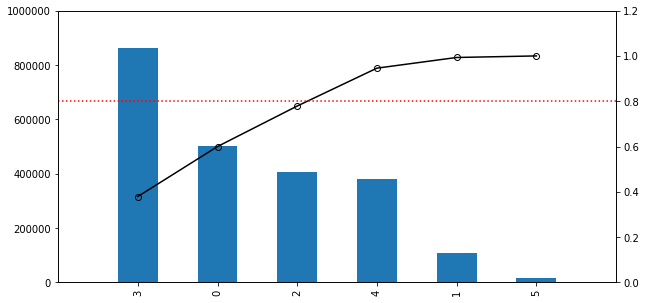

### (b) Draw a line-chart of purchase amount per single transaction by days, group with repeater. Repeater 't' and 'f' must _distinguishable_ by different color point.
**NOTE**: You should illustrate two lines in same plot, and make them distinguishable with point color.<br>
<br>
***Tip***<br>
You might have to add another column to represent amount per single transaction by each group.

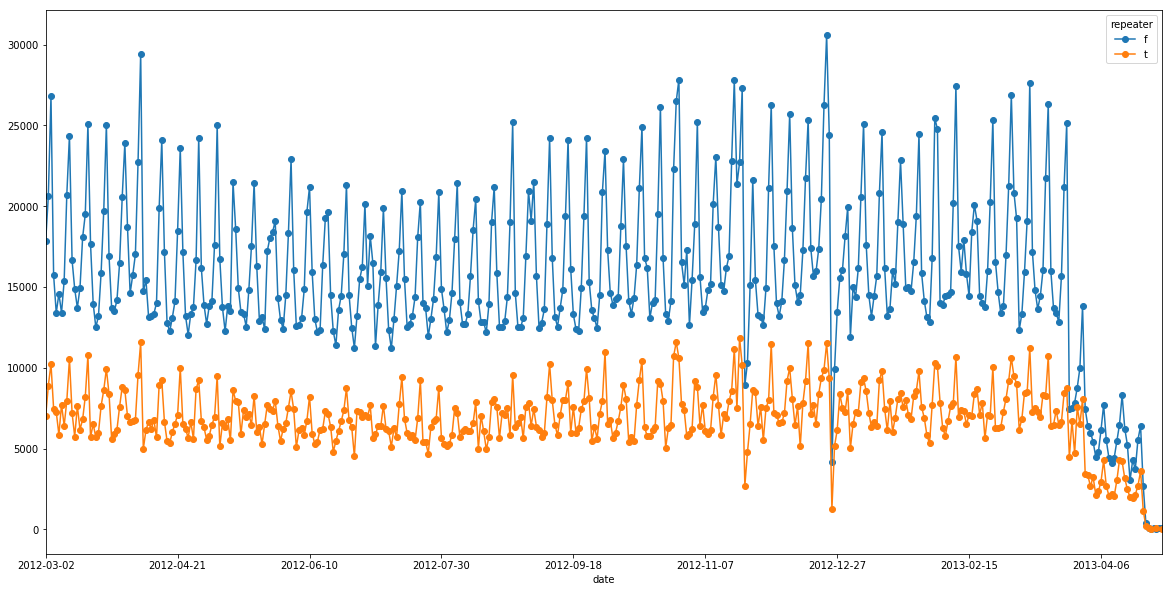